# Drug dataset

### Full sample (inbalanced)

* all predictors except for the review column, rating pre-engineered

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
pd.set_option('max_columns', None)

pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [2]:
df = pd.read_csv("drugs_df_for_lin_reg.csv")

In [3]:
df.drop(["Unnamed: 0", "drugName"], axis=1, inplace=True)

In [4]:
df

condition_clean  usefulCount  length  rating
0       Left Ventricular Dysfunction           27      17       9
1                               ADHD          192     141       8
2                      Birth Control           17     134       5
3                      Birth Control           10      89       8
4                  Opiate Dependence           37     124       9
...                              ...          ...     ...     ...
215058     Breast Cancer, Prevention           43      97      10
215059                       Anxiety           11     130       9
215060                 Birth Control            7     149       8
215061                          Pain           20      34       1
215062                      Sciatica           46       2       9

[215063 rows x 4 columns]

In [5]:
corr = df.corr("spearman")
corr

usefulCount  length  rating
usefulCount       1.0000 -0.0279  0.2811
length           -0.0279  1.0000  0.0041
rating            0.2811  0.0041  1.0000

<AxesSubplot:>

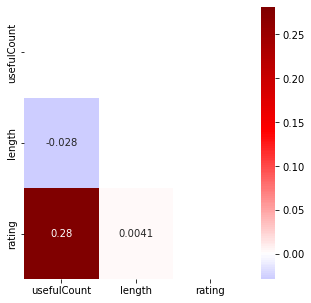

In [6]:
fig, ax = plt.subplots(figsize=(5,5))
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,
            cmap='seismic',
            mask=mask,
            center=0,
            annot=True,
            ax=ax)

In [7]:
condition_dummies = pd.get_dummies(df["condition_clean"], drop_first=True)
condition_dummies

AIDS Related Wasting  AV Heart Block  Abdominal Distension  \
0                          0               0                     0   
1                          0               0                     0   
2                          0               0                     0   
3                          0               0                     0   
4                          0               0                     0   
...                      ...             ...                   ...   
215058                     0               0                     0   
215059                     0               0                     0   
215060                     0               0                     0   
215061                     0               0                     0   
215062                     0               0                     0   

        Abnormal Uterine Bleeding  Abortion  Acetaminophen Overdose  Acne  \
0                               0         0                       0     0   
1                               0         0                       0     0   
2                               0         0                       0     0   
3                               0         0                       0     0   
4                               0         0                       0     0   
...                           ...       ...                     ...   ...   
215058                          0         0                       0     0   
215059                          0         0                       0     0   
215060                          0         0                       0     0   
215061                          0         0                       0     0   
215062                          0         0                       0     0   

        Actinic Keratosis  Acute Coronary Syndrome  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
215058                  0                        0   
215059                  0                        0   
215060                  0                        0   
215061                  0                        0   
215062                  0                        0   

        Acute Lymphoblastic Leukemia  Acute Nonlymphocytic Leukemia  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   
...                              ...                            ...   
215058                             0                              0   
215059                             0                              0   
215060                             0                              0   
215061                             0                              0   
215062                             0                              0   

        Acute Otitis Externa  Acute Promyelocytic Leukemia  Addison's Disease  \
0                          0                             0                  0   
1                          0                             0                  0   
2                          0                             0                  0   
3                          0                             0                  0   
4                          0                             0                  0   
...                      ...                           ...                ...   
215058                     0                             0                  0   
215059                     0                             0                  0   
215060     

In [8]:
df = pd.concat([df, condition_dummies], axis=1)
df

condition_clean  usefulCount  length  rating  \
0       Left Ventricular Dysfunction           27      17       9   
1                               ADHD          192     141       8   
2                      Birth Control           17     134       5   
3                      Birth Control           10      89       8   
4                  Opiate Dependence           37     124       9   
...                              ...          ...     ...     ...   
215058     Breast Cancer, Prevention           43      97      10   
215059                       Anxiety           11     130       9   
215060                 Birth Control            7     149       8   
215061                          Pain           20      34       1   
215062                      Sciatica           46       2       9   

        AIDS Related Wasting  AV Heart Block  Abdominal Distension  \
0                          0               0                     0   
1                          0               0                     0   
2                          0               0                     0   
3                          0               0                     0   
4                          0               0                     0   
...                      ...             ...                   ...   
215058                     0               0                     0   
215059                     0               0                     0   
215060                     0               0                     0   
215061                     0               0                     0   
215062                     0               0                     0   

        Abnormal Uterine Bleeding  Abortion  Acetaminophen Overdose  Acne  \
0                               0         0                       0     0   
1                               0         0                       0     0   
2                               0         0                       0     0   
3                               0         0                       0     0   
4                               0         0                       0     0   
...                           ...       ...                     ...   ...   
215058                          0         0                       0     0   
215059                          0         0                       0     0   
215060                          0         0                       0     0   
215061                          0         0                       0     0   
215062                          0         0                       0     0   

        Actinic Keratosis  Acute Coronary Syndrome  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
215058                  0                        0   
215059                  0                        0   
215060                  0                        0   
215061                  0                        0   
215062                  0                        0   

        Acute Lymphoblastic Leukemia  Acute Nonlymphocytic Leukemia  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   
...                              ...                            ...   
215058                             0                              0   
215059                             0                              0   
215060                             0                              0   
215061                             0                              0

In [9]:
df.drop(["condition_clean"], axis=1, inplace=True)

In [10]:
df

usefulCount  length  rating  AIDS Related Wasting  AV Heart Block  \
0                27      17       9                     0               0   
1               192     141       8                     0               0   
2                17     134       5                     0               0   
3                10      89       8                     0               0   
4                37     124       9                     0               0   
...             ...     ...     ...                   ...             ...   
215058           43      97      10                     0               0   
215059           11     130       9                     0               0   
215060            7     149       8                     0               0   
215061           20      34       1                     0               0   
215062           46       2       9                     0               0   

        Abdominal Distension  Abnormal Uterine Bleeding  Abortion  \
0                          0                          0         0   
1                          0                          0         0   
2                          0                          0         0   
3                          0                          0         0   
4                          0                          0         0   
...                      ...                        ...       ...   
215058                     0                          0         0   
215059                     0                          0         0   
215060                     0                          0         0   
215061                     0                          0         0   
215062                     0                          0         0   

        Acetaminophen Overdose  Acne  Actinic Keratosis  \
0                            0     0                  0   
1                            0     0                  0   
2                            0     0                  0   
3                            0     0                  0   
4                            0     0                  0   
...                        ...   ...                ...   
215058                       0     0                  0   
215059                       0     0                  0   
215060                       0     0                  0   
215061                       0     0                  0   
215062                       0     0                  0   

        Acute Coronary Syndrome  Acute Lymphoblastic Leukemia  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
215058                        0                             0   
215059                        0                             0   
215060                        0                             0   
215061                        0                             0   
215062                        0                             0   

        Acute Nonlymphocytic Leukemia  Acute Otitis Externa  \
0                                   0                     0   
1                                   0                     0   
2                                   0                     0   
3                                   0                     0   
4                                   0                     0   
...                               ...                   ...   
215058                              0                     0   
215059                              0                     0   
215060                              0                     0   
215061                              0                     0   
215062                              0                     0   

       

## Running a linear regression on non-textual variables

In [ ]:
### X/y split
X = df.drop(["rating"], axis=1)
y = df.rating
X
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
y.unique()

In [ ]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)

In [ ]:
X_test_scaled = std_scaler.transform(X_test)

In [ ]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

In [ ]:
model = LinearRegression()   
model.fit(X_train, y_train)   

In [ ]:
model.coef_ 

In [ ]:
R2_test = model.score(X_test,y_test)
R2_test

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [ ]:
# Error mertics
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

In [ ]:
# Feature importance
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

## Simple Regression with sk-learn
incl. some vector stuff
https://www.kaggle.com/neilash/team-ndl-algorithms-and-illnesses

### Classification task 
As lin reg isn't working;
incl. condition, rating 0/1 

In [11]:
df['rating'] = df.rating.apply(lambda x: 0 if x <= 6 else 1)

In [12]:
df['rating'].value_counts()

1    142306
0     72757
Name: rating, dtype: int64

In [13]:
#X/y. split
X = df.drop(columns='rating')
y = df['rating']
X
y

0         1
1         1
2         0
3         1
4         1
         ..
215058    1
215059    1
215060    1
215061    0
215062    1
Name: rating, Length: 215063, dtype: int64

In [14]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train, columns =['rating'])
y_test  = pd.DataFrame(y_test, columns =['rating'])
X_train

usefulCount  length  AIDS Related Wasting  AV Heart Block  \
37178            86      18                     0               0   
211366           41      21                     0               0   
109449            8      64                     0               0   
37312            35     142                     0               0   
21470            14      48                     0               0   
...             ...     ...                   ...             ...   
65615             0      39                     0               0   
77655             2     142                     0               0   
210755           49      40                     0               0   
56088             3      85                     0               0   
38408             3     141                     0               0   

        Abdominal Distension  Abnormal Uterine Bleeding  Abortion  \
37178                      0                          0         0   
211366                     0                          0         0   
109449                     0                          0         0   
37312                      0                          0         0   
21470                      0                          1         0   
...                      ...                        ...       ...   
65615                      0                          0         0   
77655                      0                          0         0   
210755                     0                          0         0   
56088                      0                          1         0   
38408                      0                          0         0   

        Acetaminophen Overdose  Acne  Actinic Keratosis  \
37178                        0     0                  0   
211366                       0     0                  0   
109449                       0     0                  0   
37312                        0     0                  0   
21470                        0     0                  0   
...                        ...   ...                ...   
65615                        0     0                  0   
77655                        0     0                  0   
210755                       0     0                  0   
56088                        0     0                  0   
38408                        0     0                  0   

        Acute Coronary Syndrome  Acute Lymphoblastic Leukemia  \
37178                         0                             0   
211366                        0                             0   
109449                        0                             0   
37312                         0                             0   
21470                         0                             0   
...                         ...                           ...   
65615                         0                             0   
77655                         0                             0   
210755                        0                             0   
56088                         0                             0   
38408                         0                             0   

        Acute Nonlymphocytic Leukemia  Acute Otitis Externa  \
37178                               0                     0   
211366                              0                     0   
109449                              0                     0   
37312                               0                     0   
21470                               0                     0   
...                               ...                   ...   
65615                               0                     0   
77655                               0                     0   
210755                              0                     0   
56088                               0                     0   
38408                               0                     0   

        Acute Promyelocytic Leukemia  Addison's Disease  \
37178                              0        

In [15]:
# RF model

rf = RandomForestClassifier()
rf.fit(X_train, y_train['rating'])

RandomForestClassifier()

In [16]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf  = rf.predict(X_test)

In [17]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

In [18]:
model_performance_class(y_train, y_train_pred_rf, y_test, y_test_pred_rf)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.81
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     58168
           1       0.94      0.94      0.94    113882

    accuracy                           0.92    172050
   macro avg       0.91      0.91      0.91    172050
weighted avg       0.92      0.92      0.92    172050

Results obtained for the TEST SET
The Cohen's Kappa is: 0.52
              precision    recall  f1-score   support

           0       0.69      0.67      0.68     14589
           1       0.84      0.85      0.84     28424

    accuracy                           0.79     43013
   macro avg       0.76      0.76      0.76     43013
weighted avg       0.79      0.79      0.79     43013



In [19]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [20]:
df_feat = pd.DataFrame(list(zip(feature_names, rf.feature_importances_)))
df_feat.columns = ['columns_name', 'score_feature_importance']
df_feat.sort_values(by=['score_feature_importance'], ascending = False)

columns_name  score_feature_importance
1                         length                    0.4774
0                    usefulCount                    0.2975
96                 Birth Control                    0.0118
775      Vaginal Yeast Infection                    0.0088
5      Abnormal Uterine Bleeding                    0.0077
..                           ...                       ...
332                Hypercalcemia                    0.0000
451  Multiple Endocrine Adenomas                    0.0000
360              Hypopituitarism                    0.0000
153             Cogan's Syndrome                    0.0000
198     Dermatitis Herpetiformis                    0.0000

[838 rows x 2 columns]

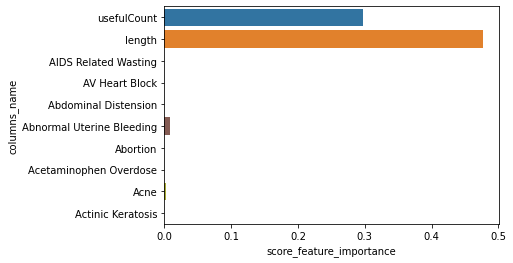

In [21]:
plot = sns.barplot(x=df_feat.score_feature_importance, y=df_feat.columns_name[:10])

### On downsample

In [22]:
# Splitting df 

category_0 = df[df['rating'] == 0]
category_1 = df[df['rating'] == 1]
category_1
category_0

usefulCount  length  rating  AIDS Related Wasting  AV Heart Block  \
2                17     134       0                     0               0   
5                43      68       0                     0               0   
6                 5      30       0                     0               0   
8                11      35       0                     0               0   
12                8      69       0                     0               0   
...             ...     ...     ...                   ...             ...   
215048            2      45       0                     0               0   
215051            8      18       0                     0               0   
215055           18      37       0                     0               0   
215056           15     136       0                     0               0   
215061           20      34       0                     0               0   

        Abdominal Distension  Abnormal Uterine Bleeding  Abortion  \
2                          0                          0         0   
5                          0                          0         0   
6                          0                          0         0   
8                          0                          0         0   
12                         0                          0         0   
...                      ...                        ...       ...   
215048                     0                          0         0   
215051                     0                          0         0   
215055                     0                          0         0   
215056                     0                          0         0   
215061                     0                          0         0   

        Acetaminophen Overdose  Acne  Actinic Keratosis  \
2                            0     0                  0   
5                            0     0                  0   
6                            0     0                  0   
8                            0     0                  0   
12                           0     0                  0   
...                        ...   ...                ...   
215048                       0     0                  0   
215051                       0     0                  0   
215055                       0     0                  0   
215056                       0     0                  0   
215061                       0     0                  0   

        Acute Coronary Syndrome  Acute Lymphoblastic Leukemia  \
2                             0                             0   
5                             0                             0   
6                             0                             0   
8                             0                             0   
12                            0                             0   
...                         ...                           ...   
215048                        0                             0   
215051                        0                             0   
215055                        0                             0   
215056                        0                             0   
215061                        0                             0   

        Acute Nonlymphocytic Leukemia  Acute Otitis Externa  \
2                                   0                     0   
5                                   0                     0   
6                                   0                     0   
8                                   0                     0   
12                                  0                     0   
...                               ...                   ...   
215048                              0                     0   
215051                              0                     0   
215055                              0                     0   
215056                              0                     0   
215061                              0                     0   

       

In [23]:
# Filtering df according to minority group 

category_1 = category_1.sample(len(category_0))
print(category_0.shape)
print(category_1.shape)

(72757, 839)
(72757, 839)


In [24]:
# Putting together the two splits

df_down = pd.concat([category_0, category_1], axis=0)
df_down = df_down.sample(frac=1)
df_down['rating'].value_counts()
df_down 

usefulCount  length  rating  AIDS Related Wasting  AV Heart Block  \
191286            4      46       1                     0               0   
57332            20      11       0                     0               0   
44423             7      53       1                     0               0   
34495            44      38       0                     0               0   
68902             9      27       0                     0               0   
...             ...     ...     ...                   ...             ...   
117852           15     120       1                     0               0   
92372            31     118       1                     0               0   
4153             51       7       1                     0               0   
100536           24     126       0                     0               0   
139098            1     141       0                     0               0   

        Abdominal Distension  Abnormal Uterine Bleeding  Abortion  \
191286                     0                          0         0   
57332                      0                          0         0   
44423                      0                          0         0   
34495                      0                          0         0   
68902                      0                          0         0   
...                      ...                        ...       ...   
117852                     0                          0         0   
92372                      0                          0         0   
4153                       0                          0         0   
100536                     0                          0         0   
139098                     0                          0         0   

        Acetaminophen Overdose  Acne  Actinic Keratosis  \
191286                       0     0                  0   
57332                        0     0                  0   
44423                        0     0                  0   
34495                        0     0                  0   
68902                        0     0                  0   
...                        ...   ...                ...   
117852                       0     0                  0   
92372                        0     0                  0   
4153                         0     0                  0   
100536                       0     0                  0   
139098                       0     0                  0   

        Acute Coronary Syndrome  Acute Lymphoblastic Leukemia  \
191286                        0                             0   
57332                         0                             0   
44423                         0                             0   
34495                         0                             0   
68902                         0                             0   
...                         ...                           ...   
117852                        0                             0   
92372                         0                             0   
4153                          0                             0   
100536                        0                             0   
139098                        0                             0   

        Acute Nonlymphocytic Leukemia  Acute Otitis Externa  \
191286                              0                     0   
57332                               0                     0   
44423                               0                     0   
34495                               0                     0   
68902                               0                     0   
...                               ...                   ...   
117852                              0                     0   
92372                               0                     0   
4153                                0                     0   
100536                              0                     0   
139098                              0                     0   

       

In [25]:
df_down_no_condition = df_down.iloc[:, :3] 
df_down_no_condition = df_down_no_condition.reset_index(drop=True)

### Rerunning random forests on downsample

In [26]:
#X/y. split
X = df_down_no_condition.drop(columns='rating')
y = df_down_no_condition['rating']
X

usefulCount  length
0                 4      46
1                20      11
2                 7      53
3                44      38
4                 9      27
...             ...     ...
145509           15     120
145510           31     118
145511           51       7
145512           24     126
145513            1     141

[145514 rows x 2 columns]

In [27]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train, columns =['rating'])
y_test  = pd.DataFrame(y_test, columns =['rating'])
X_train

usefulCount  length
51401           204     118
106328          137     123
7817            100      51
16568            14      23
134970            9      52
...             ...     ...
82270            23      78
65615            12       9
77655            20      60
56088             0      22
38408             5     116

[116411 rows x 2 columns]

In [28]:
# RF model

rf = RandomForestClassifier()
rf.fit(X_train, y_train['rating'])

RandomForestClassifier()

In [29]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf  = rf.predict(X_test)

In [30]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

In [31]:
model_performance_class(y_train, y_train_pred_rf, y_test, y_test_pred_rf)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.39
              precision    recall  f1-score   support

           0       0.66      0.79      0.72     58246
           1       0.74      0.60      0.66     58165

    accuracy                           0.70    116411
   macro avg       0.70      0.70      0.69    116411
weighted avg       0.70      0.70      0.69    116411

Results obtained for the TEST SET
The Cohen's Kappa is: 0.25
              precision    recall  f1-score   support

           0       0.60      0.72      0.66     14511
           1       0.66      0.53      0.59     14592

    accuracy                           0.63     29103
   macro avg       0.63      0.63      0.62     29103
weighted avg       0.63      0.63      0.62     29103



In [32]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [33]:
df_feat = pd.DataFrame(list(zip(feature_names, rf.feature_importances_)))
df_feat.columns = ['columns_name', 'score_feature_importance']
df_feat.sort_values(by=['score_feature_importance'], ascending = False)

columns_name  score_feature_importance
0  usefulCount                    0.5331
1       length                    0.4669

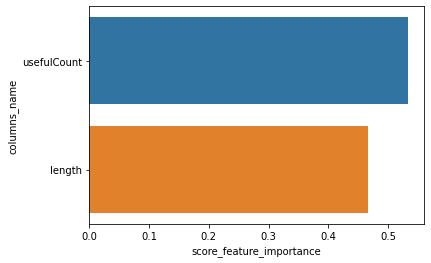

In [34]:
plot = sns.barplot(x=df_feat.score_feature_importance, y=df_feat.columns_name[:10])

##### KNN

In [ ]:
y

In [ ]:
trans = PowerTransformer()
trans.fit(X_train)

X_train_knn = trans.transform(X_train)
X_test_knn  = trans.transform(X_test)

X_train_knn = pd.DataFrame(X_train, columns = X.columns)
X_test_knn  = pd.DataFrame(X_test,  columns = X.columns)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_knn, y_train)
y_pred_train_knn = neigh.predict(X_train_knn)
y_pred_test_knn = neigh.predict(X_test_knn)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_knn,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_knn, pos_label="Yes")]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_knn,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh,X_test_knn,y_test, values_format = 'd')
plt.show()

In [ ]:
plot = sns.barplot(x=df.score_feature_importance, y=df.columns_name)